# 1. Primary data analysis

## 1.1 Connecting libraries and importing data


In [1]:
%run "../../Oleksandr Zakharchuk Handbook.ipynb"

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

In [3]:
#!pip install lightgbm

In [4]:
df_cr = pd.read_csv('Data Folder/crx.data', header=None, names=[
    "A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15", "A16"
])

## 1.2 General information


In [5]:
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [6]:
df_cr

A1     A2      A3 A4 A5  A6  A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0    b  30.83   0.000  u  g   w   v  1.25  t   t    1   f   g  00202    0   +
1    a  58.67   4.460  u  g   q   h  3.04  t   t    6   f   g  00043  560   +
2    a  24.50   0.500  u  g   q   h  1.50  t   f    0   f   g  00280  824   +
3    b  27.83   1.540  u  g   w   v  3.75  t   t    5   t   g  00100    3   +
4    b  20.17   5.625  u  g   w   v  1.71  t   f    0   f   s  00120    0   +
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  ...  ..  ..    ...  ...  ..
685  b  21.08  10.085  y  p   e   h  1.25  f   f    0   f   g  00260    0   -
686  a  22.67   0.750  u  g   c   v  2.00  f   t    2   t   g  00200  394   -
687  a  25.25  13.500  y  p  ff  ff  2.00  f   t    1   t   g  00200    1   -
688  b  17.92   0.205  u  g  aa   v  0.04  f   f    0   f   g  00280  750   -
689  b  35.00   3.375  u  g   c   h  8.29  f   f    0   t   g  00000    0   -

[690 rows x 16 columns]

A16 - target. There are also categorical, numerical and power features


Let's define numerical and categorical features:


In [7]:
numeric_features = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
categorical_features = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
target_name = 'A16'
target = [target_name]

# 2. Type conversion and value adjustment


## 2.1 Parsing Data Types and Values


In [8]:
analysis_dataframe_values_by_column(df_cr)

Search 0 value per column: 
	Column A3:  19
	Column A8:  70
	Column A11:  395
	Column A15:  295
Search nan value per column: {}
Search None value per column: {}
Search [inf, -inf] value per column: {}
Search count per column by regular expression '\W' (without single quotes): 
	Column A1:  12
	Column A2:  690
	Column A4:  6
	Column A5:  6
	Column A6:  9
	Column A7:  9
	Column A14:  13
	Column A16:  690
Search unique value per column by regular expression '\W' (without single quotes): 
	Column A1: ['?']
	Column A2: ['30.83', '58.67', '24.50', '27.83', '20.17', '32.08', '33.17', '22.92', '54.42', '42.50', '22.08', '29.92', '38.25', '48.08', '45.83', '36.67', '28.25', '23.25', '21.83', '19.17', '25.00', '47.75', '27.42', '41.17', '15.83', '47.00', '56.58', '57.42', '42.08', '29.25', '42.00', '49.50', '36.75', '22.58', '27.25', '23.00', '27.75', '54.58', '34.17', '28.92', '29.67', '39.58', '56.42', '54.33', '41.00', '31.92', '41.50', '23.92', '25.75', '26.00', '37.42', '34.92', '34.25', '2

In [9]:
df_cr[df_cr['A1'] == '?']

A1     A2      A3 A4 A5  A6  A7     A8 A9 A10  A11 A12 A13    A14   A15  \
248  ?  24.50  12.750  u  g   c  bb  4.750  t   t    2   f   g  00073   444   
327  ?  40.83   3.500  u  g   i  bb  0.500  f   f    0   f   s  01160     0   
346  ?  32.25   1.500  u  g   c   v  0.250  f   f    0   t   g  00372   122   
374  ?  28.17   0.585  u  g  aa   v  0.040  f   f    0   f   g  00260  1004   
453  ?  29.75   0.665  u  g   w   v  0.250  f   f    0   t   g  00300     0   
479  ?  26.50   2.710  y  p   ?   ?  0.085  f   f    0   f   s  00080     0   
489  ?  45.33   1.000  u  g   q   v  0.125  f   f    0   t   g  00263     0   
520  ?  20.42   7.500  u  g   k   v  1.500  t   t    1   f   g  00160   234   
598  ?  20.08   0.125  u  g   q   v  1.000  f   t    1   f   g  00240   768   
601  ?  42.25   1.750  y  p   ?   ?  0.000  f   f    0   t   g  00150     1   
641  ?  33.17   2.250  y  p  cc   v  3.500  f   f    0   t   g  00200   141   
673  ?  29.50   2.000  y  p   e   h  2.000  f   f    0   f   g  00256    17   

    A16  
248   +  
327   -  
346   -  
374   -  
453   -  
479   -  
489   -  
520   +  
598   +  
601   -  
641   -  
673   -

Let's take a look at the question mark code, we'll need it later:


In [10]:
df_cr['A1'][248]

'?'

In [11]:
question_code = ord(df_cr['A1'][248])
question_code

63

In [12]:
ord(df_cr['A1'][601])

63

We found out that the question mark code is 63


Null values ​​are valid for numeric columns


Lines that contain a '?' can be removed


## 2.2 Removing Invalid Values


### 2.2.1 Removing with regular expressions


Let's remove all instances from the df_cr dataset where at least one value is equal to a question mark. To do this, first get the list of instances to remove:


In [13]:
q_mask = get_match_mask(df_cr, '\?')
q_index_list = get_true_mask_row_positions(q_mask)

Number of instances to be deleted:


In [14]:
len(q_index_list[0])

24

Removing Instances:


In [15]:
df_cr = df_cr.drop(q_index_list[0])
df_cr

A1     A2      A3 A4 A5  A6  A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0    b  30.83   0.000  u  g   w   v  1.25  t   t    1   f   g  00202    0   +
1    a  58.67   4.460  u  g   q   h  3.04  t   t    6   f   g  00043  560   +
2    a  24.50   0.500  u  g   q   h  1.50  t   f    0   f   g  00280  824   +
3    b  27.83   1.540  u  g   w   v  3.75  t   t    5   t   g  00100    3   +
4    b  20.17   5.625  u  g   w   v  1.71  t   f    0   f   s  00120    0   +
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  ...  ..  ..    ...  ...  ..
685  b  21.08  10.085  y  p   e   h  1.25  f   f    0   f   g  00260    0   -
686  a  22.67   0.750  u  g   c   v  2.00  f   t    2   t   g  00200  394   -
687  a  25.25  13.500  y  p  ff  ff  2.00  f   t    1   t   g  00200    1   -
688  b  17.92   0.205  u  g  aa   v  0.04  f   f    0   f   g  00280  750   -
689  b  35.00   3.375  u  g   c   h  8.29  f   f    0   t   g  00000    0   -

[666 rows x 16 columns]

In [16]:
q_index_list[0]

array([ 83,  86,  92,  97, 248, 254, 286, 327, 329, 346, 374, 445, 450,
       453, 479, 489, 500, 515, 520, 598, 601, 608, 641, 673], dtype=int64)

Let's look at the analysis of values ​​by columns again:


In [17]:
analysis_dataframe_values_by_column(df_cr)

Search 0 value per column: 
	Column A3:  19
	Column A8:  67
	Column A11:  376
	Column A15:  284
Search nan value per column: {}
Search None value per column: {}
Search [inf, -inf] value per column: {}
Search count per column by regular expression '\W' (without single quotes): 
	Column A2:  666
	Column A4:  6
	Column A5:  6
	Column A6:  7
	Column A7:  7
	Column A14:  12
	Column A16:  666
Search unique value per column by regular expression '\W' (without single quotes): 
	Column A2: ['30.83', '58.67', '24.50', '27.83', '20.17', '32.08', '33.17', '22.92', '54.42', '42.50', '22.08', '29.92', '38.25', '48.08', '45.83', '36.67', '28.25', '23.25', '21.83', '19.17', '25.00', '47.75', '27.42', '41.17', '15.83', '47.00', '56.58', '57.42', '42.08', '29.25', '42.00', '49.50', '36.75', '22.58', '27.25', '23.00', '27.75', '54.58', '34.17', '28.92', '29.67', '39.58', '56.42', '54.33', '41.00', '31.92', '41.50', '23.92', '25.75', '26.00', '37.42', '34.92', '34.25', '23.33', '23.17', '44.33', '35.17', 

Let's take a look at some of the values ​​that the regular expression couldn't find:


In [18]:
df_cr[df_cr['A4'] == '?']

A1     A2   A3 A4 A5 A6 A7   A8 A9 A10  A11 A12 A13 A14  A15 A16
206  a  71.58  0.0  ?  ?  ?  ?  0.0  f   f    0   f   p   ?    0   +
270  b  37.58  0.0  ?  ?  ?  ?  0.0  f   f    0   f   p   ?    0   +
330  b  20.42  0.0  ?  ?  ?  ?  0.0  f   f    0   f   p   ?    0   -
456  b  34.58  0.0  ?  ?  ?  ?  0.0  f   f    0   f   p   ?    0   -
592  b  23.17  0.0  ?  ?  ?  ?  0.0  f   f    0   f   p   ?    0   +
622  a  25.58  0.0  ?  ?  ?  ?  0.0  f   f    0   f   p   ?    0   +

Let's take a look at the question mark code in the instances that weren't deleted:


In [19]:
df_cr['A4'][206]

'?'

In [20]:
ord(df_cr['A4'][206])

63

In [21]:
ord('?')

63

It is also equal to 63, like those instances that were removed:


In [22]:
question_code

63

In [23]:
# ord(df_cr['A1'][248])

### 2.2.1 Manual removal


In [24]:
analysis_dataframe_values_by_column(df_cr)

Search 0 value per column: 
	Column A3:  19
	Column A8:  67
	Column A11:  376
	Column A15:  284
Search nan value per column: {}
Search None value per column: {}
Search [inf, -inf] value per column: {}
Search count per column by regular expression '\W' (without single quotes): 
	Column A2:  666
	Column A4:  6
	Column A5:  6
	Column A6:  7
	Column A7:  7
	Column A14:  12
	Column A16:  666
Search unique value per column by regular expression '\W' (without single quotes): 
	Column A2: ['30.83', '58.67', '24.50', '27.83', '20.17', '32.08', '33.17', '22.92', '54.42', '42.50', '22.08', '29.92', '38.25', '48.08', '45.83', '36.67', '28.25', '23.25', '21.83', '19.17', '25.00', '47.75', '27.42', '41.17', '15.83', '47.00', '56.58', '57.42', '42.08', '29.25', '42.00', '49.50', '36.75', '22.58', '27.25', '23.00', '27.75', '54.58', '34.17', '28.92', '29.67', '39.58', '56.42', '54.33', '41.00', '31.92', '41.50', '23.92', '25.75', '26.00', '37.42', '34.92', '34.25', '23.33', '23.17', '44.33', '35.17', 

In [25]:
for column in ['A4', 'A5', 'A6', 'A7', 'A14']:
    df_cr = df_cr[df_cr[column] != '?']

Let's look at the analysis after manual deletion:


In [26]:
analysis_dataframe_values_by_column(df_cr)

Search 0 value per column: 
	Column A3:  13
	Column A8:  60
	Column A11:  366
	Column A15:  275
Search nan value per column: {}
Search None value per column: {}
Search [inf, -inf] value per column: {}
Search count per column by regular expression '\W' (without single quotes): 
	Column A2:  653
	Column A16:  653
Search unique value per column by regular expression '\W' (without single quotes): 
	Column A2: ['30.83', '58.67', '24.50', '27.83', '20.17', '32.08', '33.17', '22.92', '54.42', '42.50', '22.08', '29.92', '38.25', '48.08', '45.83', '36.67', '28.25', '23.25', '21.83', '19.17', '25.00', '47.75', '27.42', '41.17', '15.83', '47.00', '56.58', '57.42', '42.08', '29.25', '42.00', '49.50', '36.75', '22.58', '27.25', '23.00', '27.75', '54.58', '34.17', '28.92', '29.67', '39.58', '56.42', '54.33', '41.00', '31.92', '41.50', '23.92', '25.75', '26.00', '37.42', '34.92', '34.25', '23.33', '23.17', '44.33', '35.17', '43.25', '56.75', '31.67', '23.42', '20.42', '26.67', '36.00', '25.50', '19.4

We see that the remaining instances with question marks have been removed.


In [27]:
df_cr

A1     A2      A3 A4 A5  A6  A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0    b  30.83   0.000  u  g   w   v  1.25  t   t    1   f   g  00202    0   +
1    a  58.67   4.460  u  g   q   h  3.04  t   t    6   f   g  00043  560   +
2    a  24.50   0.500  u  g   q   h  1.50  t   f    0   f   g  00280  824   +
3    b  27.83   1.540  u  g   w   v  3.75  t   t    5   t   g  00100    3   +
4    b  20.17   5.625  u  g   w   v  1.71  t   f    0   f   s  00120    0   +
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  ...  ..  ..    ...  ...  ..
685  b  21.08  10.085  y  p   e   h  1.25  f   f    0   f   g  00260    0   -
686  a  22.67   0.750  u  g   c   v  2.00  f   t    2   t   g  00200  394   -
687  a  25.25  13.500  y  p  ff  ff  2.00  f   t    1   t   g  00200    1   -
688  b  17.92   0.205  u  g  aa   v  0.04  f   f    0   f   g  00280  750   -
689  b  35.00   3.375  u  g   c   h  8.29  f   f    0   t   g  00000    0   -

[653 rows x 16 columns]

The number of lines has been reduced to 653


## 2.2 Type conversion


Let's convert chifi A2, A3, A8, A2, A3, A8 to a numeric type:


In [28]:
df_cr[numeric_features] = df_cr[numeric_features].apply(pd.to_numeric)

In [29]:
df_cr[numeric_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A2      653 non-null    float64
 1   A3      653 non-null    float64
 2   A8      653 non-null    float64
 3   A11     653 non-null    int64  
 4   A14     653 non-null    int64  
 5   A15     653 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 35.7 KB


In [30]:
df_cr[numeric_features]

A2      A3    A8  A11  A14  A15
0    30.83   0.000  1.25    1  202    0
1    58.67   4.460  3.04    6   43  560
2    24.50   0.500  1.50    0  280  824
3    27.83   1.540  3.75    5  100    3
4    20.17   5.625  1.71    0  120    0
..     ...     ...   ...  ...  ...  ...
685  21.08  10.085  1.25    0  260    0
686  22.67   0.750  2.00    2  200  394
687  25.25  13.500  2.00    1  200    1
688  17.92   0.205  0.04    0  280  750
689  35.00   3.375  8.29    0    0    0

[653 rows x 6 columns]

Let's look at the analysis of dataset values ​​again:


In [31]:
analysis_dataframe_values_by_column(df_cr)

Search 0 value per column: 
	Column A3:  13
	Column A8:  60
	Column A11:  366
	Column A14:  128
	Column A15:  275
Search nan value per column: {}
Search None value per column: {}
Search [inf, -inf] value per column: {}
Search count per column by regular expression '\W' (without single quotes): 
	Column A16:  653
Search unique value per column by regular expression '\W' (without single quotes): 
	Column A16: ['+', '-']


We see that after the type conversion, column A2 is no longer defined as a column with special characters.


This report looks much better than in paragraph 2.1, we removed the question marks and converted the types


# 3. Encoding and scaling


## 3.1 Analysis 

Let's take a look at the distribution of numerical features:


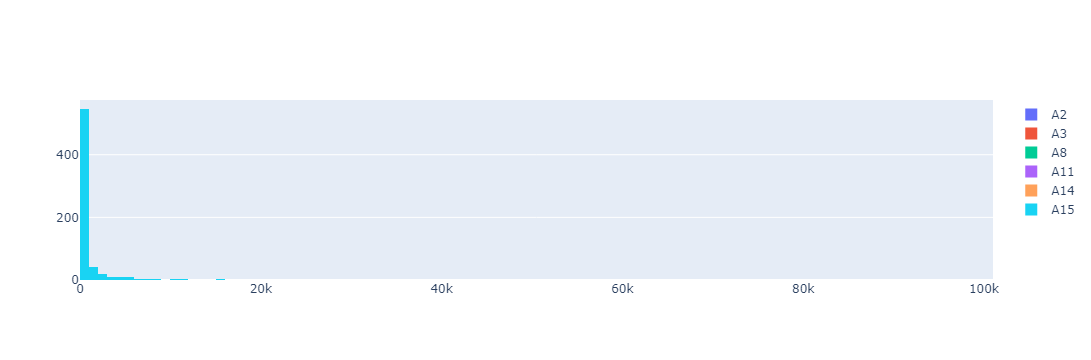

In [32]:
show_histogram_for_multiple_columns(df_cr, numeric_features)

Category features:


In [33]:
df_cr[categorical_features].value_counts()

A1  A4  A5  A6  A7  A9  A10  A12  A13
b   u   g   c   v   f   f    f    g      12
a   u   g   q   v   t   t    f    g      10
b   u   g   c   v   t   t    f    g       9
a   u   g   q   h   t   t    f    g       8
b   u   g   c   v   t   t    t    g       8
                                         ..
            i   bb  t   t    t    g       1
a   u   g   q   v   f   f    f    s       1
b   u   g   i   h   t   f    f    g       1
                             t    g       1
a   l   gg  cc  ff  f   f    t    s       1
Length: 348, dtype: int64

Encode them with LabelEncoder


Let's take a look at the feature correlation heatmap:


C:\Users\Administrator\AppData\Local\Temp\ipykernel_21412\2920076791.py:51: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



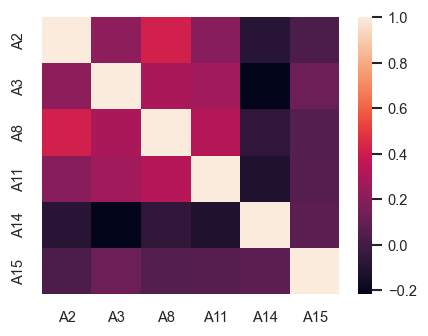

In [34]:
show_heatmap_corr(df_cr, 'df_cr_corr.png')

We will have more features to analyze on the heatmap after coding. At the moment, there are no strong dependencies (more than 0.6)


## 3.2 Encoding and scaling of categorical features and targets


In [35]:
df_cr[categorical_features + target] = df_cr[categorical_features + target].apply(LabelEncoder().fit_transform)
df_cr[categorical_features + target]

A1  A4  A5  A6  A7  A9  A10  A12  A13  A16
0     1   1   0  12   7   1    1    0    0    0
1     0   1   0  10   3   1    1    0    0    0
2     0   1   0  10   3   1    0    0    0    0
3     1   1   0  12   7   1    1    1    0    0
4     1   1   0  12   7   1    0    0    2    0
..   ..  ..  ..  ..  ..  ..  ...  ...  ...  ...
685   1   2   2   4   3   0    0    0    0    1
686   0   1   0   1   7   0    1    1    0    1
687   0   2   2   5   2   0    1    1    0    1
688   1   1   0   0   7   0    0    0    0    1
689   1   1   0   1   3   0    0    1    0    1

[653 rows x 10 columns]

In [36]:
get_value_counts_by_column(df_cr, categorical_features + target)

Column:  A1
1    450
0    203
Name: A1, dtype: int64 

Column:  A4
1    499
2    152
0      2
Name: A4, dtype: int64 

Column:  A5
0    499
2    152
1      2
Name: A5, dtype: int64 

Column:  A6
1     133
10     75
12     63
6      55
0      52
5      50
8      48
2      40
9      38
13     36
3      26
4      24
7      10
11      3
Name: A6, dtype: int64 

Column:  A7
7    381
3    137
2     54
0     53
4      8
8      8
1      6
5      4
6      2
Name: A7, dtype: int64 

Column:  A9
1    349
0    304
Name: A9, dtype: int64 

Column:  A10
0    366
1    287
Name: A10, dtype: int64 

Column:  A12
0    351
1    302
Name: A12, dtype: int64 

Column:  A13
0    598
2     53
1      2
Name: A13, dtype: int64 

Column:  A16
1    357
0    296
Name: A16, dtype: int64 



In [37]:
df_cr[categorical_features + target] = minmax_scale(df_cr, categorical_features + target)
df_cr[categorical_features + target]

Min-value after min-max scaling: A1=0.0
Max-value after min-max scaling: A1=1.0

Min-value after min-max scaling: A4=0.0
Max-value after min-max scaling: A4=1.0

Min-value after min-max scaling: A5=0.0
Max-value after min-max scaling: A5=1.0

Min-value after min-max scaling: A6=0.0
Max-value after min-max scaling: A6=1.0

Min-value after min-max scaling: A7=0.0
Max-value after min-max scaling: A7=1.0

Min-value after min-max scaling: A9=0.0
Max-value after min-max scaling: A9=1.0

Min-value after min-max scaling: A10=0.0
Max-value after min-max scaling: A10=1.0

Min-value after min-max scaling: A12=0.0
Max-value after min-max scaling: A12=1.0

Min-value after min-max scaling: A13=0.0
Max-value after min-max scaling: A13=1.0

Min-value after min-max scaling: A16=0.0
Max-value after min-max scaling: A16=1.0



A1   A4   A5        A6     A7   A9  A10  A12  A13  A16
0    1.0  0.5  0.0  0.923077  0.875  1.0  1.0  0.0  0.0  0.0
1    0.0  0.5  0.0  0.769231  0.375  1.0  1.0  0.0  0.0  0.0
2    0.0  0.5  0.0  0.769231  0.375  1.0  0.0  0.0  0.0  0.0
3    1.0  0.5  0.0  0.923077  0.875  1.0  1.0  1.0  0.0  0.0
4    1.0  0.5  0.0  0.923077  0.875  1.0  0.0  0.0  1.0  0.0
..   ...  ...  ...       ...    ...  ...  ...  ...  ...  ...
685  1.0  1.0  1.0  0.307692  0.375  0.0  0.0  0.0  0.0  1.0
686  0.0  0.5  0.0  0.076923  0.875  0.0  1.0  1.0  0.0  1.0
687  0.0  1.0  1.0  0.384615  0.250  0.0  1.0  1.0  0.0  1.0
688  1.0  0.5  0.0  0.000000  0.875  0.0  0.0  0.0  0.0  1.0
689  1.0  0.5  0.0  0.076923  0.375  0.0  0.0  1.0  0.0  1.0

[653 rows x 10 columns]

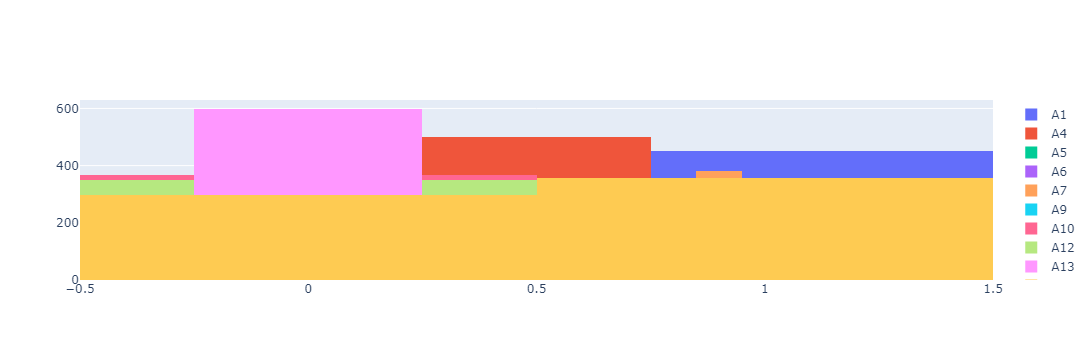

In [38]:
show_histogram_for_multiple_columns(df_cr, categorical_features + target)

## 3.3 Scaling Numeric Features


In [39]:
df_cr[numeric_features] = std_scale(df_cr, numeric_features)
df_cr[numeric_features]

Mean after standardization: A2 = -2.1218351221013712e-16
Standard deviation after standardization: A2 = 1.0

Mean after standardization: A3 = -8.704964603492805e-17
Standard deviation after standardization: A3 = 1.0

Mean after standardization: A8 = 1.3057446905239208e-16
Standard deviation after standardization: A8 = 1.0

Mean after standardization: A11 = 0.0
Standard deviation after standardization: A11 = 0.9999999999999998

Mean after standardization: A14 = 5.440602877183003e-17
Standard deviation after standardization: A14 = 0.9999999999999999

Mean after standardization: A15 = -1.0881205754366006e-17
Standard deviation after standardization: A15 = 1.0



A2        A3        A8       A11       A14       A15
0   -0.056962 -0.961440 -0.295171 -0.302596  0.128682 -0.193125
1    2.296536 -0.073565  0.236217  0.704516 -0.816802 -0.086443
2   -0.592078 -0.861903 -0.220955 -0.504019  0.592504 -0.036150
3   -0.310572 -0.654865  0.446990  0.503093 -0.477855 -0.192553
4   -0.958122  0.158358 -0.158613 -0.504019 -0.358926 -0.193125
..        ...       ...       ...       ...       ...       ...
685 -0.881193  1.046233 -0.295171 -0.504019  0.473575 -0.193125
686 -0.746780 -0.812134 -0.072523 -0.101174  0.116789 -0.118066
687 -0.528676  1.726075 -0.072523 -0.302596  0.116789 -0.192934
688 -1.148329 -0.920630 -0.654378 -0.504019  0.592504 -0.050247
689  0.295556 -0.289561  1.794756 -0.504019 -1.072499 -0.193125

[653 rows x 6 columns]

Let's take a look at the distribution after scaling:


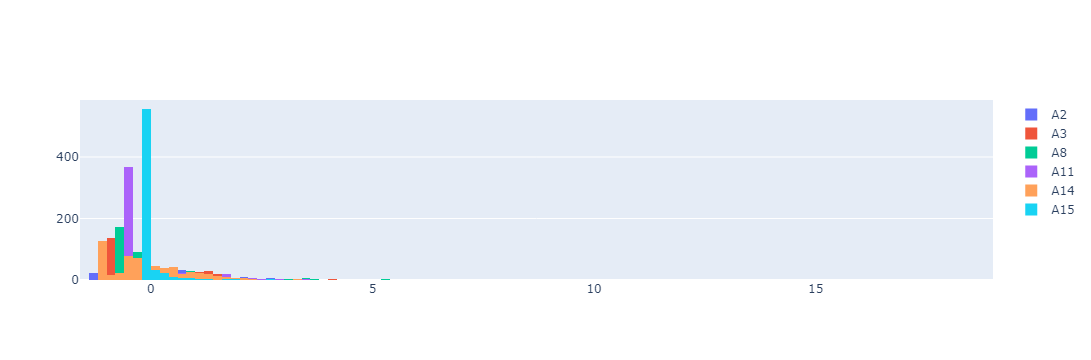

In [40]:
show_histogram_for_multiple_columns(df_cr, numeric_features)

# 4. Feature engineering

Let's take a look at the thermal feature correlation matrix after encoding and scaling:


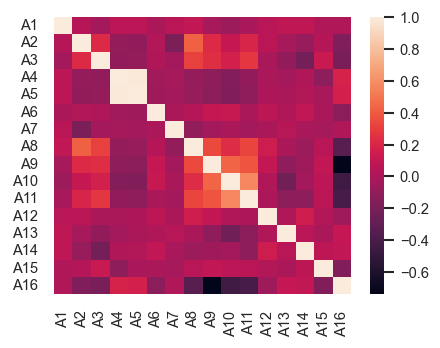

In [41]:
show_heatmap_corr(df_cr, 'df_cr_corr_after_scale.png')

We see a strong correlation between features A5 and A4


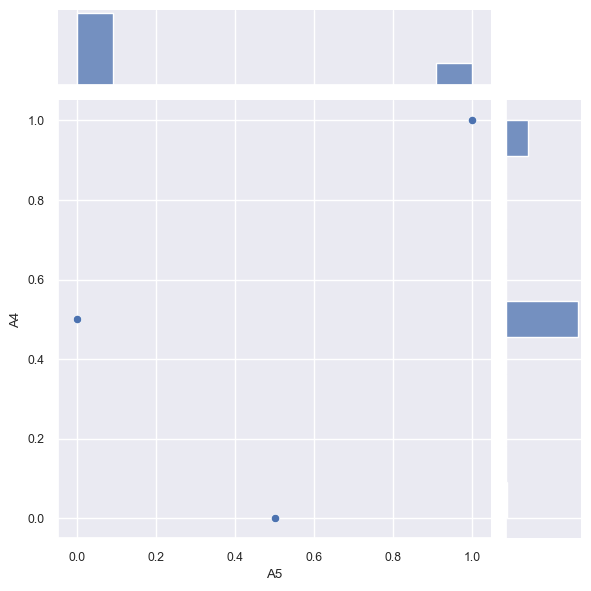

In [42]:
show_pair_plot(df_cr, 'A5', 'A4')

Let's take a look at the unique values ​​of these features:


In [43]:
get_value_counts_by_column(df_cr, ['A5', 'A4'])

Column:  A5
0.0    499
1.0    152
0.5      2
Name: A5, dtype: int64 

Column:  A4
0.5    499
1.0    152
0.0      2
Name: A4, dtype: int64 



Let's add these features to get a new feature A5_A4:


In [44]:
df_cr['A5_A4'] = df_cr['A4'] + df_cr['A4']
df_cr = df_cr.drop(columns=['A5', 'A4'])
df_cr

A1        A2        A3        A6     A7        A8   A9  A10       A11  \
0    1.0 -0.056962 -0.961440  0.923077  0.875 -0.295171  1.0  1.0 -0.302596   
1    0.0  2.296536 -0.073565  0.769231  0.375  0.236217  1.0  1.0  0.704516   
2    0.0 -0.592078 -0.861903  0.769231  0.375 -0.220955  1.0  0.0 -0.504019   
3    1.0 -0.310572 -0.654865  0.923077  0.875  0.446990  1.0  1.0  0.503093   
4    1.0 -0.958122  0.158358  0.923077  0.875 -0.158613  1.0  0.0 -0.504019   
..   ...       ...       ...       ...    ...       ...  ...  ...       ...   
685  1.0 -0.881193  1.046233  0.307692  0.375 -0.295171  0.0  0.0 -0.504019   
686  0.0 -0.746780 -0.812134  0.076923  0.875 -0.072523  0.0  1.0 -0.101174   
687  0.0 -0.528676  1.726075  0.384615  0.250 -0.072523  0.0  1.0 -0.302596   
688  1.0 -1.148329 -0.920630  0.000000  0.875 -0.654378  0.0  0.0 -0.504019   
689  1.0  0.295556 -0.289561  0.076923  0.375  1.794756  0.0  0.0 -0.504019   

     A12  A13       A14       A15  A16  A5_A4  
0    0.0  0.0  0.128682 -0.193125  0.0    1.0  
1    0.0  0.0 -0.816802 -0.086443  0.0    1.0  
2    0.0  0.0  0.592504 -0.036150  0.0    1.0  
3    1.0  0.0 -0.477855 -0.192553  0.0    1.0  
4    0.0  1.0 -0.358926 -0.193125  0.0    1.0  
..   ...  ...       ...       ...  ...    ...  
685  0.0  0.0  0.473575 -0.193125  1.0    2.0  
686  1.0  0.0  0.116789 -0.118066  1.0    1.0  
687  1.0  0.0  0.116789 -0.192934  1.0    2.0  
688  0.0  0.0  0.592504 -0.050247  1.0    1.0  
689  1.0  0.0 -1.072499 -0.193125  1.0    1.0  

[653 rows x 15 columns]

Let's look at the correlation matrix again:


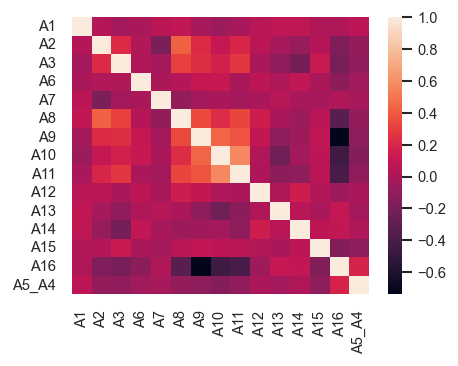

In [45]:
show_heatmap_corr(df_cr, 'df_cr_corr_after_feature_engineering.png')

We managed to get rid of strong dependencies


# 4. Dividing the dataset into training and test parts


In [46]:
X, y = get_features_target_split(df_cr, target_name)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 5. Classification 

## 5.1 DecisionTreeClassifier

In [47]:
clf = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)

In [48]:
y_pred = clf.predict(X_test)

In [49]:
list(zip(X_test, y_pred, y_test))

[('A1', 0.0, 1.0),
 ('A2', 1.0, 1.0),
 ('A3', 0.0, 0.0),
 ('A6', 1.0, 1.0),
 ('A7', 1.0, 1.0),
 ('A8', 1.0, 1.0),
 ('A9', 1.0, 1.0),
 ('A10', 0.0, 0.0),
 ('A11', 0.0, 1.0),
 ('A12', 1.0, 1.0),
 ('A13', 0.0, 0.0),
 ('A14', 1.0, 1.0),
 ('A15', 1.0, 1.0),
 ('A5_A4', 1.0, 0.0)]

In [50]:
print(classification_report(y_test, y_pred, target_names=[f'class_{i}' for i in range(2)]))

              precision    recall  f1-score   support

     class_0       0.77      0.79      0.78        95
     class_1       0.83      0.81      0.82       121

    accuracy                           0.80       216
   macro avg       0.80      0.80      0.80       216
weighted avg       0.80      0.80      0.80       216



We see a good f1-score for our classes: 0.78 and 0.82


## 5.2 RandomForestClassifier (Bagging)

In [51]:
clf_rf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_test, y_test)

In [52]:
y_pred_rf = clf_rf.predict(X_test)

In [53]:
list(zip(X_test, y_pred_rf, y_test))

[('A1', 0.0, 1.0),
 ('A2', 1.0, 1.0),
 ('A3', 0.0, 0.0),
 ('A6', 1.0, 1.0),
 ('A7', 1.0, 1.0),
 ('A8', 1.0, 1.0),
 ('A9', 0.0, 1.0),
 ('A10', 0.0, 0.0),
 ('A11', 1.0, 1.0),
 ('A12', 1.0, 1.0),
 ('A13', 0.0, 0.0),
 ('A14', 1.0, 1.0),
 ('A15', 1.0, 1.0),
 ('A5_A4', 0.0, 0.0)]

In [54]:
print(classification_report(y_test, y_pred_rf, target_names=[f'class_{i}' for i in range(2)]))

              precision    recall  f1-score   support

     class_0       0.91      0.79      0.85        95
     class_1       0.85      0.94      0.89       121

    accuracy                           0.88       216
   macro avg       0.88      0.87      0.87       216
weighted avg       0.88      0.88      0.87       216



Also a good f1-score for our classes: 0.85 and 0.89


## 5.3 StackingClassifier (Stacking)

In [55]:
estimators = [
  ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
  ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))
  ]
clf_stck = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [56]:
clf_stck = clf_stck.fit(X_train, y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [57]:
y_pred_stck = clf_stck.predict(X_test)

In [58]:
print(classification_report(y_test, y_pred_stck, target_names=[f'class_{i}' for i in range(2)]))

              precision    recall  f1-score   support

     class_0       0.78      0.86      0.82        95
     class_1       0.88      0.81      0.84       121

    accuracy                           0.83       216
   macro avg       0.83      0.84      0.83       216
weighted avg       0.84      0.83      0.83       216



Also a good f1-score for our classes: 0.82 and 0.84


## 5.4 GradientBoostingClassifier (Boosting)

In [59]:
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

In [60]:
y_pred_gb = clf_gb.predict(X_test)

In [61]:
print(classification_report(y_test, y_pred_gb, target_names=[f'class_{i}' for i in range(2)]))

              precision    recall  f1-score   support

     class_0       0.82      0.80      0.81        95
     class_1       0.85      0.86      0.85       121

    accuracy                           0.83       216
   macro avg       0.83      0.83      0.83       216
weighted avg       0.83      0.83      0.83       216



Also a good f1-score for our classes: 0.81 and 0.85


## 5.5 LGBMClassifier (Boosting)

In [62]:
clf_lgbm = LGBMClassifier().fit(X_train, y_train)

In [63]:
y_pred_lgbm = clf_lgbm.predict(X_test)

In [64]:
print(classification_report(y_test, y_pred_lgbm, target_names=[f'class_{i}' for i in range(2)]))

              precision    recall  f1-score   support

     class_0       0.84      0.83      0.84        95
     class_1       0.87      0.88      0.87       121

    accuracy                           0.86       216
   macro avg       0.85      0.85      0.85       216
weighted avg       0.86      0.86      0.86       216



Also a good f1-score for our classes: 0.84 and 0.87


# 6. Evaluation of results


The received reports in point 5 show good precision (~0.8) and f1-score (~0.8) for all classifiers. Particularly good performance for RandomForestClassifier (Bagging), where precision for classes is 0.91 and 0.85 respectively.


# 7. Building Decision Boundaries for Decision Trees


## 7.1 DecisionTreeClassifier

Options:

In [65]:
feature_number = len(X.columns.values) - 1
n_classes = len(np.unique(y)) - 1
plot_colors = 'rb'

In this implementation, we will train the classifier on pairs of features: each feature is paired with all subsequent ones in turn (but not with the previous ones). For clarity, let's take a look at the pairs of features that will be shown in the chart:


In [66]:
first_series = get_first_series_for_pair_train(feature_number)
second_series = get_second_series_for_pair_train(feature_number)
[list(a) for a in zip(first_series, second_series)]

[[0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [0, 7],
 [0, 8],
 [0, 9],
 [0, 10],
 [0, 11],
 [0, 12],
 [0, 13],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [1, 6],
 [1, 7],
 [1, 8],
 [1, 9],
 [1, 10],
 [1, 11],
 [1, 12],
 [1, 13],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [2, 7],
 [2, 8],
 [2, 9],
 [2, 10],
 [2, 11],
 [2, 12],
 [2, 13],
 [3, 4],
 [3, 5],
 [3, 6],
 [3, 7],
 [3, 8],
 [3, 9],
 [3, 10],
 [3, 11],
 [3, 12],
 [3, 13],
 [4, 5],
 [4, 6],
 [4, 7],
 [4, 8],
 [4, 9],
 [4, 10],
 [4, 11],
 [4, 12],
 [4, 13],
 [5, 6],
 [5, 7],
 [5, 8],
 [5, 9],
 [5, 10],
 [5, 11],
 [5, 12],
 [5, 13],
 [6, 7],
 [6, 8],
 [6, 9],
 [6, 10],
 [6, 11],
 [6, 12],
 [6, 13],
 [7, 8],
 [7, 9],
 [7, 10],
 [7, 11],
 [7, 12],
 [7, 13],
 [8, 9],
 [8, 10],
 [8, 11],
 [8, 12],
 [8, 13],
 [9, 10],
 [9, 11],
 [9, 12],
 [9, 13],
 [10, 11],
 [10, 12],
 [10, 13],
 [11, 12],
 [11, 13],
 [12, 13]]

A total of 91 pairs of features have been released and 91 charts will be built


Let's take a look at the number of rows for each target class:


In [67]:
df_cr[target].value_counts()

A16
1.0    357
0.0    296
dtype: int64

Let's build classification graphs for decision trees:


CPU times: total: 3min 33s
Wall time: 3min 34s


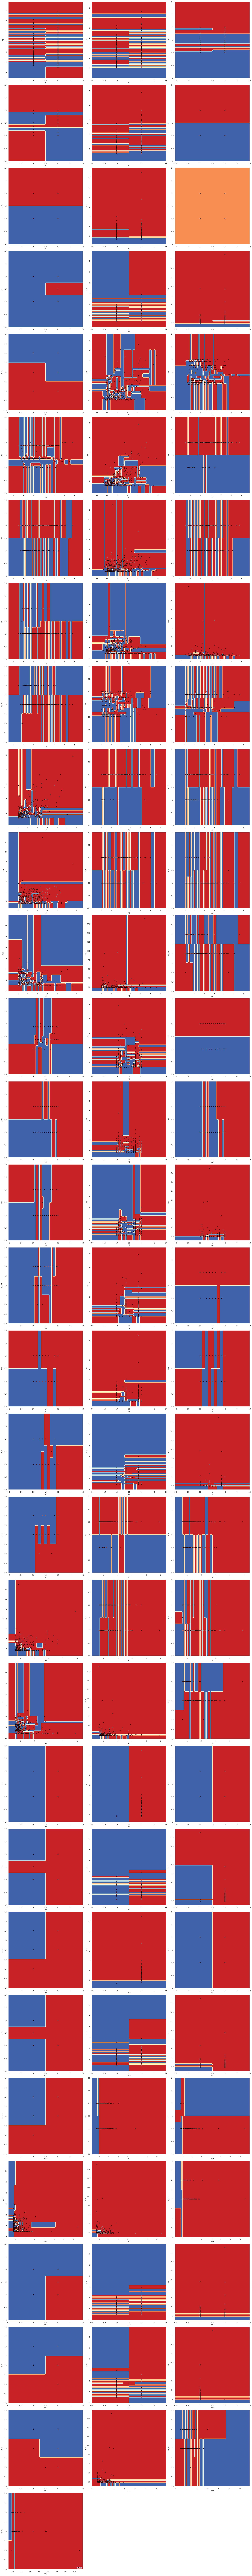

In [68]:
%%time
plt.figure(figsize=(20, 200))
show_decision_trees_plot(X, y, feature_number, n_classes, plot_colors)